In [2]:
import csv
import pickle
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../../../utils/')
from cmptTheoreticalEmitGrowth import *
from bunchLengthConversions import *
from coordinatesConversions import *
from cmpt_TuneSpreads import *

### Plotting parameters

In [3]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 10,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Study parameters

In [4]:
n_sets=20
n_runs=3
n_turns = int(1e5)            # number of cycles to run the simulation for
decTurns = int(100)           # how often to record data
circumference  = 6911.5623 # [m]
f_rev  = 299792458/circumference  # [Hz] The revolution frequency of the machine 
separationTime = 1 / f_rev * decTurns #There are decTurns revolutions before each recording of data
tspan = (np.arange(n_turns / decTurns) + 1.0) * separationTime #total time spanned by the simulationpan)

In [5]:
my_variables=list(np.linspace(0.0, 0.3, 25))
my_variables[0] = 1e-9
print(my_variables)

[1e-09, 0.012499999999999999, 0.024999999999999998, 0.0375, 0.049999999999999996, 0.06249999999999999, 0.075, 0.0875, 0.09999999999999999, 0.11249999999999999, 0.12499999999999999, 0.13749999999999998, 0.15, 0.16249999999999998, 0.175, 0.18749999999999997, 0.19999999999999998, 0.2125, 0.22499999999999998, 0.2375, 0.24999999999999997, 0.26249999999999996, 0.27499999999999997, 0.2875, 0.3]


In [6]:
QpxQpy=1

noise_type = 'PN'

path_to_data = './'
study_name='deyRates_sps_270GeV_wakesOFF_QpxQpy1_Nb5e5_turns600_ayy0_slices500_intensity3e10_sigmaScan'

my_df = pickle.load( open(path_to_data+study_name+'.pkl', "rb" ))

In [7]:
my_df

,sigmaZ_0.000,sigmaZ_0.012,sigmaZ_0.025,sigmaZ_0.037,sigmaZ_0.050,sigmaZ_0.062,sigmaZ_0.075,sigmaZ_0.087,sigmaZ_0.100,sigmaZ_0.112,...,sigmaZ_0.187,sigmaZ_0.200,sigmaZ_0.212,sigmaZ_0.225,sigmaZ_0.237,sigmaZ_0.250,sigmaZ_0.262,sigmaZ_0.275,sigmaZ_0.287,sigmaZ_0.300
m,"[-2.0130592401423956e-14, -2.1733007738530356e...","[1.259898390244165e-12, 1.1788958346999308e-12...","[1.5609697426970548e-11, 7.764913546012512e-12...","[4.045262095152548e-11, 3.221455413429964e-11,...","[1.287675869406656e-10, 6.594332656943899e-11,...","[2.2331844076570803e-10, 1.2146582428357492e-1...","[3.8244422929601145e-10, 2.258163626358414e-10...","[7.129042364512114e-10, 3.3056092388403836e-10...","[1.127416650891477e-09, 5.021321907650992e-10,...","[1.675984305586118e-09, 7.867743078008225e-10,...",...,"[7.985800631047505e-09, 3.503374683157016e-09,...","[9.661498502274492e-09, 4.388138088933151e-09,...","[1.1193455877428102e-08, 5.089947279563147e-09...","[1.2973946753975368e-08, 5.815980711486657e-09...","[1.4568177216383282e-08, 6.448551070581138e-09...","[1.6180903632174894e-08, 7.283823851396015e-09...","[1.7744969296232877e-08, 8.088833331032654e-09...","[1.959315651645232e-08, 8.718164163026904e-09,...","[2.1114882915082326e-08, 9.468295851611239e-09...","[2.2501147372513716e-08, 1.046124844183774e-08..."
b,"[2.298710528544842e-06, 2.299757229516814e-06,...","[2.2970775701772016e-06, 2.2996347308777107e-0...","[2.2990130373261527e-06, 2.3019199150118376e-0...","[2.2984687326109722e-06, 2.3007075004725973e-0...","[2.299785267771059e-06, 2.299091483420562e-06,...","[2.2983645951938328e-06, 2.3001423037322693e-0...","[2.300530775383917e-06, 2.3004549118793107e-06...","[2.3003909401386472e-06, 2.299691552150093e-06...","[2.298706009063405e-06, 2.2991629821378666e-06...","[2.298805175382711e-06, 2.2971518756452674e-06...",...,"[2.299559569082095e-06, 2.3011772545007925e-06...","[2.303786965865894e-06, 2.3033956730979104e-06...","[2.3028228115133855e-06, 2.308552576159328e-06...","[2.2991405593130778e-06, 2.3015570454788333e-0...","[2.300666816309007e-06, 2.302016735612949e-06,...","[2.2982078451105893e-06, 2.2986048732706144e-0...","[2.303405733463465e-06, 2.301858804773721e-06,...","[2.299926293122687e-06, 2.3014218714935288e-06...","[2.2987134914525333e-06, 2.3033749606230538e-0...","[2.3012476583945034e-06, 2.2994800388768138e-0..."
err,"[5.424767861679391e-14, 1.3473304132372183e-13...","[9.256591398190353e-14, 2.920038309289849e-13,...","[4.991461664055927e-13, 2.813370525500699e-13,...","[1.179161330892767e-12, 1.0383267422155341e-12...","[3.1274601318993682e-12, 1.6262951046936638e-1...","[5.36386511536843e-12, 2.4484705813344117e-12,...","[9.261122623249472e-12, 4.295261870606044e-12,...","[1.551197793499577e-11, 6.155913909204582e-12,...","[2.3783981238177883e-11, 9.98001357056969e-12,...","[3.569518081881479e-11, 1.4403111254378174e-11...",...,"[1.6832893377680968e-10, 6.322204461042837e-11...","[2.0026476608439632e-10, 7.674475432569713e-11...","[2.311680781532595e-10, 8.93997083580466e-11, ...","[2.6850077023469794e-10, 1.0260434278698191e-1...","[2.999271774418807e-10, 1.1250224034771364e-10...","[3.34329100580894e-10, 1.2624709632049137e-10,...","[3.6591227172822784e-10, 1.3942561772370197e-1...","[3.9699147155904233e-10, 1.4982643111047856e-1...","[4.3087196318757366e-10, 1.6047713594718506e-1...","[4.5791425554269516e-10, 1.7592235712176092e-1..."


In [8]:
my_df_keys = list(my_df.keys()) # same keys for both data Frames
print(my_df_keys)

['sigmaZ_0.000', 'sigmaZ_0.012', 'sigmaZ_0.025', 'sigmaZ_0.037', 'sigmaZ_0.050', 'sigmaZ_0.062', 'sigmaZ_0.075', 'sigmaZ_0.087', 'sigmaZ_0.100', 'sigmaZ_0.112', 'sigmaZ_0.125', 'sigmaZ_0.137', 'sigmaZ_0.150', 'sigmaZ_0.162', 'sigmaZ_0.175', 'sigmaZ_0.187', 'sigmaZ_0.200', 'sigmaZ_0.212', 'sigmaZ_0.225', 'sigmaZ_0.237', 'sigmaZ_0.250', 'sigmaZ_0.262', 'sigmaZ_0.275', 'sigmaZ_0.287', 'sigmaZ_0.300']


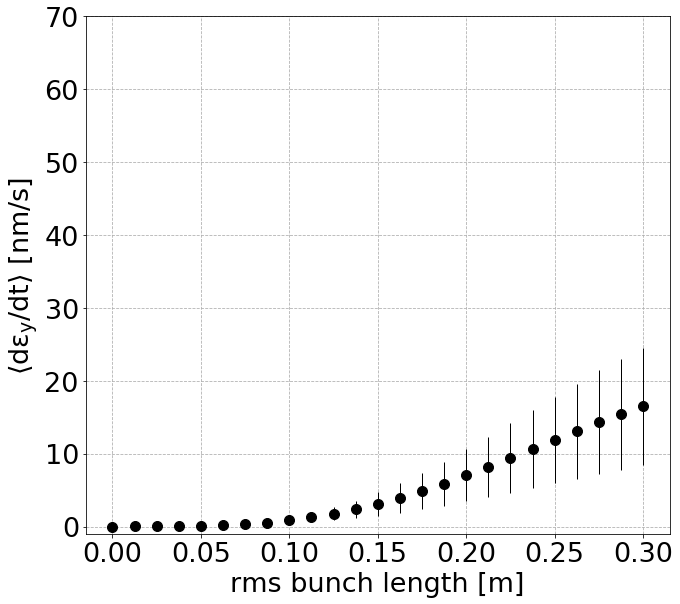

In [9]:
fig, ax = plt.subplots(1,1)

for i, key in enumerate(my_df_keys):
        
    # errors for study 1
    systematic_error_1 = np.std(my_df[key]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df[key]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
 
    ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='k')#, label=my_label_1)
    
ax.set_xlabel('rms bunch length [m]')
ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s] }$')

ax.set_ylim(-1, 70)
plt.grid(linestyle='dashed')


#ax.legend(loc=2, frameon=False, handles=[err1, theory[0], vspan])

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}Scan.png', bbox_inches='tight')

## Compare with the theoretical expected growth without the wakes

In [21]:
# Machine parameters
betay = 73.81671646 # 73 m at CC2, 76 m at CC1
clight = 299792458 # m/s
Vcc = 1e6 # V
Eb = 270e9 # eV
gamma_0 = 287.8 
beta_0 = np.sqrt(1 - 1/gamma_0**2)
circumference = 6911.5623 # m
frev = 299792458/circumference # Hz
f_CC = 400e6 # CC frequency in Hz

# Noise kick parameters
A_phase = 1e-8 # rms kick in the simulation of the phase noise
A_amplitude = 0 # rms kick in the simulation of the amplitude noise
scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
#PSD_phi = 1.42e-10
#PSD_phi = 1.4e-10
PSD_A = (A_amplitude * scale_factor)**2/frev # V^2/Hz
print(f'psd phi: {PSD_phi} rad^2/Hz, psd A: {PSD_A} V^2/Hz')

psd phi: 1.6806723392287607e-10 rad^2/Hz, psd A: 0.0 V^2/Hz


In [26]:
# Compute the correction factor due to the bunch length
sigma_z = np.array(my_variables)
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = [1.         0.9891383  0.95794852 0.91032216 0.85184924 0.78874308
 0.72677224 0.67044784 0.62260734 0.58440433 0.55560788 0.53506156
 0.52115678 0.51221775 0.50675237 0.50357145 0.50180782 0.50087577
 0.50040602 0.50018015 0.5000765  0.50003109 0.50001209 0.5000045
 0.5000016 ], CDeltaA = [3.51405308e-17 5.43085121e-03 2.10257411e-02 4.48389189e-02
 7.40753797e-02 1.05628459e-01 1.36613881e-01 1.64776079e-01
 1.88696332e-01 2.07797834e-01 2.22196060e-01 2.32469219e-01
 2.39421611e-01 2.43891127e-01 2.46623817e-01 2.48214276e-01
 2.49096089e-01 2.49562114e-01 2.49796989e-01 2.49909926e-01
 2.49961752e-01 2.49984457e-01 2.49993955e-01 2.49997750e-01
 2.49999199e-01]
expected growth = [46.07415415 45.5737104  44.13666768 41.94232363 39.24823322 36.34067036
 33.4854161  30.89031725 28.68610641 26.92593527 25.59916312 24.65250892
 24.01185772 23.59999941 23.34818666 23.20162849 23.12037098 23.0774275
 23.05578417 23.04537726 23.04060154 23.03850933 23.0376341  23.0372844
 23.03

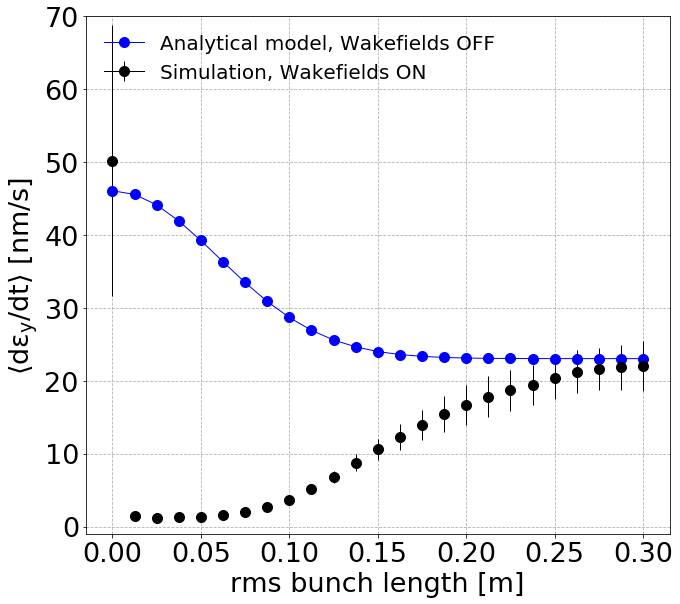

In [59]:
fig, ax = plt.subplots(1,1)

for i, key in enumerate(my_df_keys):
        
    # errors for study 1
    systematic_error_1 = np.std(my_df[key]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df[key]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    if i == 0:
        err1= ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='k', label='Simulation, Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o',  c='k')#, label=my_label_1)
ax.set_xlabel('rms bunch length [m]')
ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s] }$')

ax.plot(my_variables, expected_growth*1e9, '-o', c='b', label='Analytical model, Wakefields OFF')


ax.set_ylim(-1, 70)
plt.grid(linestyle='dashed')


ax.legend(loc=2, frameon=False, handles=[theory[0], err1])

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}ScanZvsTheorywithoutWakes.png', bbox_inches='tight')

### Add area of realistic tune spread for SPS

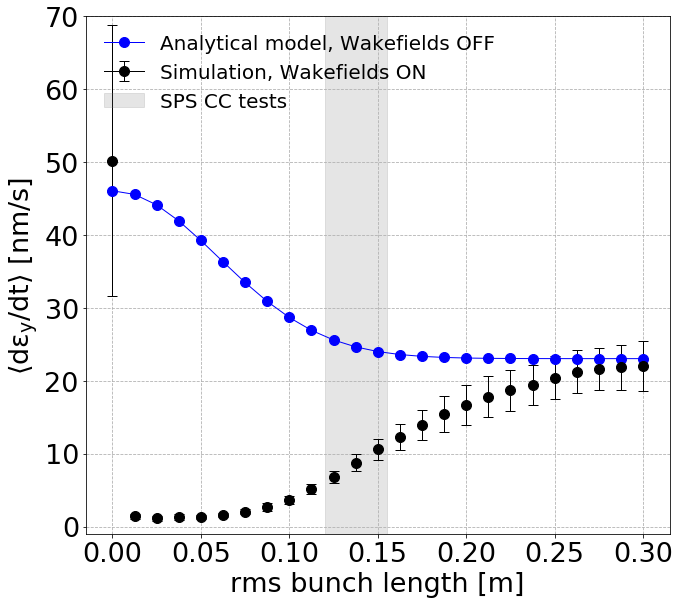

In [68]:
fig, ax = plt.subplots(1,1)

mean_dey = []

for i, key in enumerate(my_df_keys):
          
    # errors for study 1
    systematic_error_1 = np.std(my_df[key]['m'])
    statistical_error_1 = np.sqrt(np.mean(np.array(my_df[key]['err'])**2))
    total_error_1 = np.sqrt(systematic_error_1**2+statistical_error_1**2)
    
    #mean_dey.append(np.mean(my_df[key]['m'])*1e9)
    
    if i == 0:
        err1= ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='k', label='Simulation, Wakefields ON')
    else:
        ax.errorbar(my_variables[i], np.mean(my_df[key]['m'])*1e9, yerr=total_error_1*1e9, marker='o', capsize=5, c='k')#, label=my_label_1)
    
    
# plotting line
#ax.plot(my_variables, mean_dey, ls='-',c='k')
    
ax.set_xlabel('rms bunch length [m]')
ax.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s] }$')

theory = ax.plot(my_variables, expected_growth*1e9, 'o-', c='b', label='Analytical model, Wakefields OFF')

vspan = ax.axvspan(0.12 , 0.155, alpha=0.2, color='grey', label='SPS CC tests')

ax.legend(loc=2, frameon=False, handles=[theory[0], err1, vspan])


ax.set_ylim(-1, 70)
plt.grid(linestyle='dashed')

plt.tight_layout()

savefig = False
if savefig:
    plt.savefig(f'./figures/{study_name}ScanZvsTheorywithoutWakesVSSPSsigmaZ.png', bbox_inches='tight')